In [1]:
import os
import pandas as pd
from googleapiclient.discovery import build

In [2]:
#set up youtube api client
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "" #use your developer key from google developers

youtube = build(api_service_name,api_version, developerKey = DEVELOPER_KEY)

In [3]:
#set up the video id and other parameters
video_id = "NzlYRGyDSt0"
max_results = 500
next_page_token = None
comments = []

In [4]:
#retreive the comments using the comments API
while True:
  comments_request = youtube.commentThreads().list(
      part ='snippet',
      videoId = video_id,
      pageToken = next_page_token,
      maxResults = max_results
  )

  comments_response = comments_request.execute()

  for item in comments_response['items']:
    comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
    timestamp = item['snippet']['topLevelComment']['snippet']['publishedAt']
    like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
    comments.append([comment, timestamp, like_count])

  if 'nextPageToken' in comments_response:
      next_page_token = comments_response['nextPageToken']
  else:
      break

#convert the comments to dataframe
comments_df = pd.DataFrame(comments, columns =['comment','timestamp','like_count'])

#export to csv file
output_file_path = os.path.join(os.getcwd(),'comments.csv')
comments_df.to_csv(output_file_path, index = False)

In [6]:
comments_df

,comment,timestamp,like_count
0,Over the next few weeks we are going to cover ...,2023-10-08T14:08:00Z,3061
1,"Nice explanation, but I have to say something....",2023-12-03T06:24:48Z,0
2,Israyili yo ko apne des jarman chale jana chah...,2023-12-03T05:55:02Z,0
3,SUPORT ISRAEL ❤❤<br>👇🏼,2023-12-03T03:01:24Z,0
4,FREE PALESTINE,2023-12-02T03:25:21Z,0
...,...,...,...
12516,What&#39;s happening between Israel and<br>Pal...,2023-10-08T13:00:57Z,2331
12517,ABHI AND NIYU NEVER DISAPPOINTS❤,2023-10-08T12:50:45Z,59
12518,WE STRONGLY SUPPORT ISRAEL 🇮🇱,2023-10-08T12:48:01Z,8
12519,Who do you support? Israel or Palestine? Comme...,2023-10-08T12:46:23Z,308


In [7]:
from textblob import TextBlob

comments_df = pd.read_csv('comments.csv')

#function to perform sentiment analysis on each comment

def get_sentiment_score(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

#apply the fucnction to each comment and create new colum for sentiment score
comments_df['sentiment_score'] = comments_df['comment'].apply(get_sentiment_score)

#export the update dataframe
output_file_path = 'comments_with_sentiments.csv'
comments_df.to_csv(output_file_path, index = False)


In [8]:
import matplotlib.pyplot as plt

comments_df = pd.read_csv("comments_with_sentiments.csv")

#convert sentiment score to string labels

sentiment_labels = []

for sentiment in comments_df['sentiment_score']:
    if sentiment > 0:
      sentiment_labels.append('positive')
    elif sentiment < 0:
      sentiment_labels.append('negative')
    else:
      sentiment_labels.append('neutral')

#count the sentiment labels

counts = pd.Series(sentiment_labels).value_counts()
print(counts)

neutral     7242
positive    3742
negative    1539
dtype: int64


In [9]:
comments_df

,comment,timestamp,like_count,sentiment_score
0,Over the next few weeks we are going to cover ...,2023-10-08T14:08:00Z,3061.0,0.208333
1,"Nice explanation, but I have to say something....",2023-12-03T06:24:48Z,0.0,0.083929
2,Israyili yo ko apne des jarman chale jana chah...,2023-12-03T05:55:02Z,0.0,0.000000
3,SUPORT ISRAEL ❤❤<br>👇🏼,2023-12-03T03:01:24Z,0.0,0.000000
4,FREE PALESTINE,2023-12-02T03:25:21Z,0.0,0.400000
...,...,...,...,...
12518,What&#39;s happening between Israel and<br>Pal...,2023-10-08T13:00:57Z,2331.0,0.330952
12519,ABHI AND NIYU NEVER DISAPPOINTS❤,2023-10-08T12:50:45Z,59.0,0.000000
12520,WE STRONGLY SUPPORT ISRAEL 🇮🇱,2023-10-08T12:48:01Z,8.0,0.433333
12521,Who do you support? Israel or Palestine? Comme...,2023-10-08T12:46:23Z,308.0,0.000000


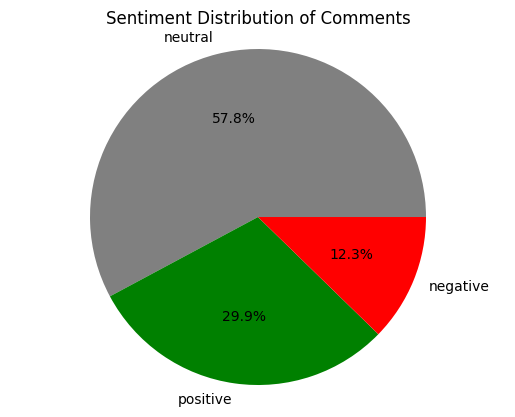

In [10]:
#create pie charts

labels = counts.index.tolist()
values = counts.values.tolist()

colors = {
    'positive' :'green',
    'neutral'  : 'grey',
    'negative'  :'red'
}

colors = [colors[label] for label in labels]

#create pie chart

plt.pie(values,labels=labels, colors = colors, autopct = '%1.1f%%')
plt.title('Sentiment Distribution of Comments')
plt.axis('equal')
plt.show()

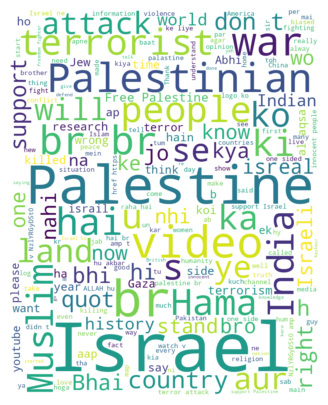

In [11]:
from wordcloud import WordCloud

all_comments_text = " ".join(comments_df['comment'])

wordcloud = WordCloud(width = 800, height = 1000, background_color = 'white').generate(all_comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

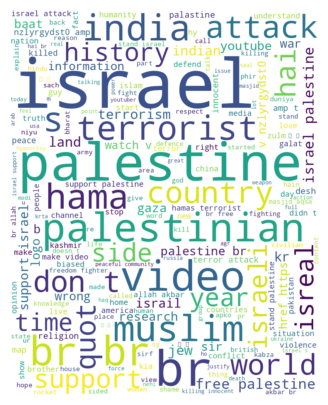

In [13]:
custom_stopwords = set(stopwords.words())

def remove_stopwords_and_tokenize(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in custom_stopwords]
    return " ".join(words)

comments_df['comment'] = comments_df['comment'].apply(remove_stopwords_and_tokenize)

all_comments_text = " ".join(comments_df['comment'])

wordcloud = WordCloud(width = 800, height = 1000, background_color = 'white').generate(all_comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

# Load the comments data from the CSV file (assuming you've already loaded the comments as described in previous responses)
comments_df = pd.read_csv("comments.csv")

# Join all comments into a single text string
all_comments_text = " ".join(comments_df["comment"])

# Tokenize the text (split it into words)
words = word_tokenize(all_comments_text)

# Define a set of stopwords to filter out common words
custom_stopwords = set(stopwords.words("english"))

# Filter out stopwords and convert words to lowercase
words = [word.lower() for word in words if word.lower() not in custom_stopwords]

# Count the frequency of each word
word_freq = Counter(words)

# Display the most common words and their frequencies
most_common_words = word_freq.most_common(20)  # Change the number to get more or fewer common words
for word, freq in most_common_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


.: 5880
<: 5270
>: 5270
,: 4949
israel: 4851
br: 4677
palestine: 3406
hai: 3027
;: 3019
&: 2979
?: 2713
#: 2118
39: 2068
ko: 2029
ki: 1361
video: 1356
...: 1269
ke: 1232
people: 1230
war: 1119
